In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier 



In [6]:
dfs=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day30-function-transformer/train.csv", usecols=['Age','Fare','Survived'])

In [9]:
dfs.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
dfs.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [11]:
dfs["Age"].fillna(dfs['Age'].mean(),inplace=True) # fill the null value by mean of the data point 

In [12]:
dfs['Age'].isnull().sum()

0

In [13]:
dfs.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [15]:
X=dfs.iloc[:,1:3]
y=dfs.iloc[:,0]

In [17]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [18]:
X_train,X_test,Y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=6)

In [19]:
X_train.shape

(668, 2)

In [20]:
Y_train.shape

(668,)

In [23]:

import scipy.stats as stats


C:\Users\rajpu\AppData\Local\Temp\ipykernel_26708\2923553825.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["Age"])


Text(0.5, 1.0, 'Age QQ plot')

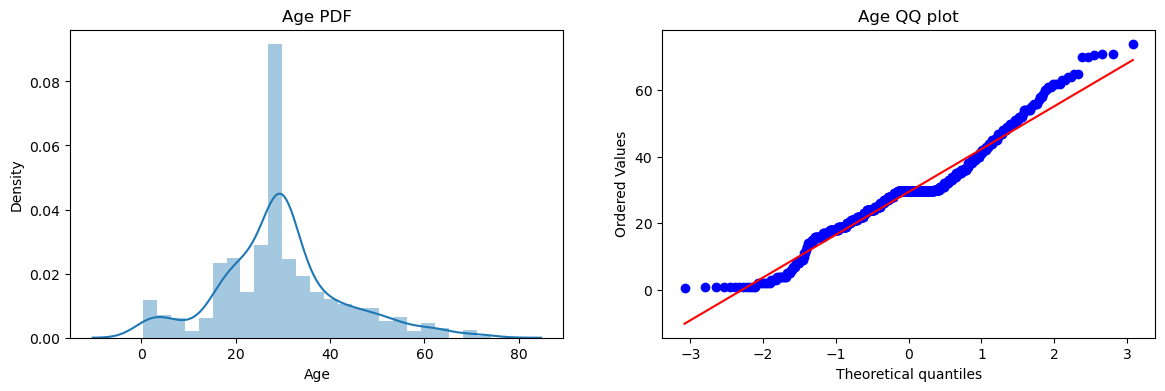

In [25]:
import seaborn as sns 
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train["Age"])
plt.title("Age PDF")
plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title("Age QQ plot")

C:\Users\rajpu\AppData\Local\Temp\ipykernel_26708\1153208447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["Fare"])


Text(0.5, 1.0, 'Fare QQ plot')

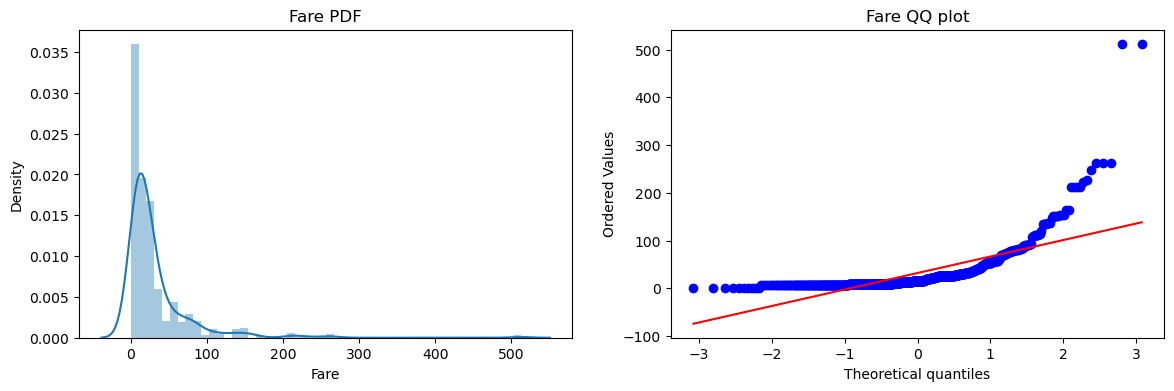

In [26]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train["Fare"])
plt.title("Fare PDF")
plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title("Fare QQ plot")

In [30]:
Clf=LinearRegression()

In [31]:
clf2=DecisionTreeClassifier()

In [32]:
Clf.fit(X_train,Y_train)

LinearRegression()

In [40]:
clf2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [43]:
y_pred=clf2.predict(X_test)

In [44]:
accuracy_score(y_pred,y_test)  # using Decision tree classifier 

0.695067264573991

In [34]:
Clf.predict(X_test)

array([0.52626741, 0.30906023, 0.32851025, 0.41287634, 0.35114341,
       0.34575519, 0.28487775, 0.33590155, 0.32892444, 0.46902962,
       0.38388708, 0.38680788, 0.34215867, 0.45841268, 0.47398986,
       0.33164401, 0.32929198, 0.50813361, 0.49541013, 0.33966481,
       0.32892444, 0.37564335, 0.50903597, 0.30915178, 0.39401662,
       0.22943852, 0.3039244 , 0.34098824, 0.38198651, 0.36574912,
       0.51652478, 0.25540815, 0.19464608, 0.50035361, 0.36436275,
       0.3269078 , 0.32023667, 0.31764821, 0.2805698 , 0.46023832,
       0.35585565, 0.35723254, 0.3758205 , 0.34726705, 0.31645153,
       0.3374704 , 0.32898746, 0.36709519, 0.34876824, 0.3152362 ,
       0.18934173, 0.32892444, 0.2740502 , 0.34745236, 0.25799661,
       0.37029197, 0.25130055, 0.34932947, 0.32749064, 0.88293439,
       0.35535157, 0.28338846, 0.35761364, 0.36741029, 0.39677234,
       0.32542822, 0.928444  , 0.29434268, 0.25071017, 0.356324  ,
       0.34582443, 0.37221706, 0.4847102 , 0.32761161, 0.32656

In [39]:

Clf.score(X_test,y_test)*100

10.260794398055905

In [47]:
clf3=LogisticRegression()

In [49]:
clf3.fit(X_train,Y_train)

LogisticRegression()

In [51]:
ypred=clf3.predict(X_test)

In [54]:
accuracy_score(ypred,y_test) #using logistic regreesion algorithm 

0.6860986547085202

In [55]:
from sklearn.preprocessing import FunctionTransformer

In [58]:
trf=FunctionTransformer(func=np.log1p)

In [63]:
transfromed_x=trf.fit_transform(X_train)
transformed_test=trf.transform(X_test)

In [61]:
clf2.fit(transfromed_x,Y_train)

DecisionTreeClassifier()

In [65]:
prd=clf2.predict(transformed_test)

In [69]:
accuracy_score(prd,y_test)

0.695067264573991

In [70]:
clf3.fit(transfromed_x,Y_train)

LogisticRegression()

In [75]:
predi=clf3.predict(transformed_test) # there is no improvment on tree like model

In [74]:
accuracy_score(predi,y_test) # imporved the accuracy after applying transformation on logistic regression model

0.7085201793721974

In [ ]:
#checking the accuracy after applying the cross validation 

In [78]:
X_transformed = trf.fit_transform(X)

clf3 = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf3,X_transformed,y,scoring='accuracy',cv=25)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=25)))

LR 0.6794603174603175
DT 0.6654603174603174


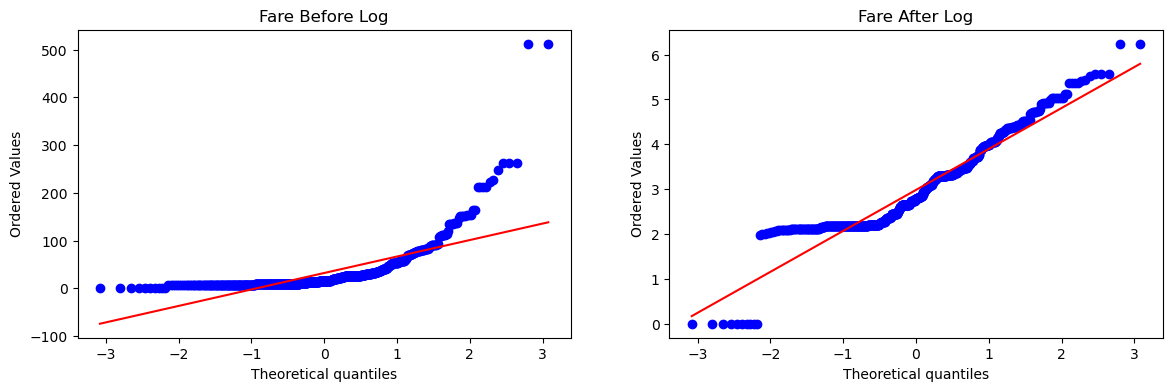

In [80]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(transfromed_x['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

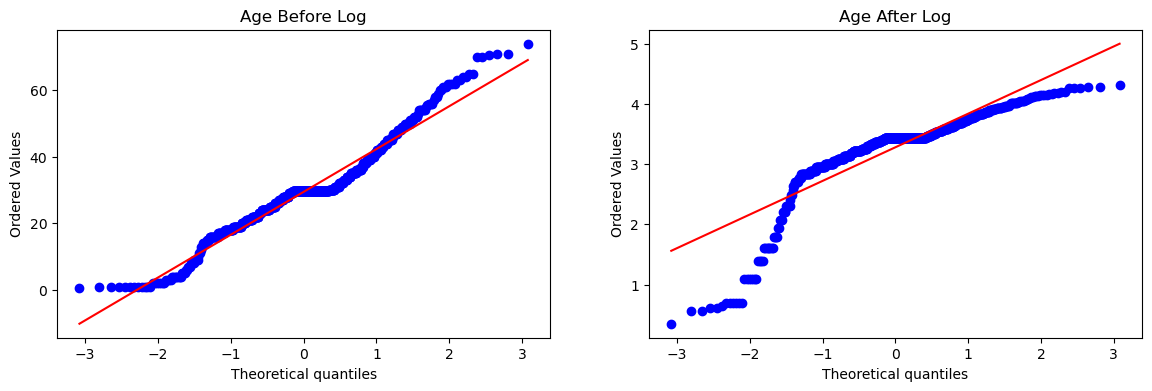

In [81]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(transfromed_x['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [82]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [84]:
clf3 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf3.fit(X_train_transformed2,Y_train)
clf2.fit(X_train_transformed2,Y_train)
    
y_pred = clf3.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.695067264573991
Accuracy DT 0.6816143497757847


In [ ]:
# check with the cross validat

In [85]:
X_transformed2 = trf2.fit_transform(X)

clf3 = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf3,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6622222222222222


In [ ]:
#defined the function transformed 

In [86]:
def apply_transform(transform):
    X = dfs.iloc[:,1:3]
    y = dfs.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6195131086142323


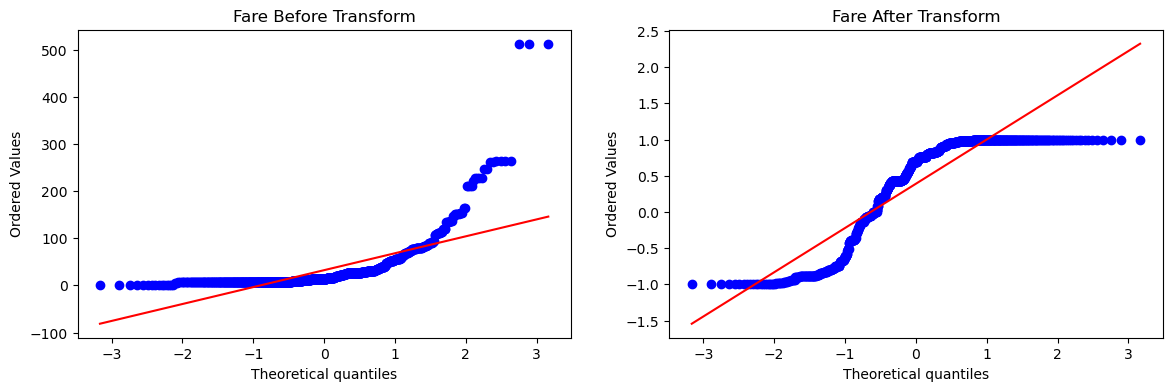

In [87]:
apply_transform(np.sin)